Replicating Idiosyncratic Volatility Result.

In [54]:
#import statements
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from finance_byu.summarize import summary
from finance_byu.regtables import Regtable
from finance_byu.rolling import roll_idio
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
#load daily CRSP price data
data = pd.read_feather("crsp_daily.ftr")
data['prc'] = data['prc'].abs()
df = data.query("10 <= shrcd <= 11").reset_index(drop=True)
df

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr
0,10000,1986-01-07,10,3,3990,2.56250,NaN,1000.0,3680.0
1,10000,1986-01-08,10,3,3990,2.50000,-0.024390,12800.0,3680.0
2,10000,1986-01-09,10,3,3990,2.50000,0.000000,1400.0,3680.0
3,10000,1986-01-10,10,3,3990,2.50000,0.000000,8500.0,3680.0
4,10000,1986-01-13,10,3,3990,2.62500,0.050000,5450.0,3680.0
...,...,...,...,...,...,...,...,...,...
81054359,93436,2023-12-22,11,3,9999,252.53999,-0.007701,93148541.0,3178921.0
81054360,93436,2023-12-26,11,3,9999,256.60999,0.016116,86700724.0,3178921.0
81054361,93436,2023-12-27,11,3,9999,261.44000,0.018822,106250779.0,3178921.0
81054362,93436,2023-12-28,11,3,9999,253.17999,-0.031594,113250680.0,3178921.0


In [39]:
#import daily market returns, both equal and value weighted
market_returns = pd.read_csv("dsi.csv",parse_dates=['caldt'])
market_returns = market_returns[['caldt', 'mkt']]

In [40]:
#merge market returns to overall stock dataframe
df = pd.merge(df, market_returns, on = ['caldt'], how = 'left')
df

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,mkt
0,10000,1986-01-07,10,3,3990,2.56250,NaN,1000.0,3680.0,0.013809
1,10000,1986-01-08,10,3,3990,2.50000,-0.024390,12800.0,3680.0,-0.020744
2,10000,1986-01-09,10,3,3990,2.50000,0.000000,1400.0,3680.0,-0.011219
3,10000,1986-01-10,10,3,3990,2.50000,0.000000,8500.0,3680.0,0.000083
4,10000,1986-01-13,10,3,3990,2.62500,0.050000,5450.0,3680.0,0.002750
...,...,...,...,...,...,...,...,...,...,...
81054359,93436,2023-12-22,11,3,9999,252.53999,-0.007701,93148541.0,3178921.0,0.002440
81054360,93436,2023-12-26,11,3,9999,256.60999,0.016116,86700724.0,3178921.0,0.005218
81054361,93436,2023-12-27,11,3,9999,261.44000,0.018822,106250779.0,3178921.0,0.001995
81054362,93436,2023-12-28,11,3,9999,253.17999,-0.031594,113250680.0,3178921.0,-0.000108


In [41]:
df['idio_vol'] = df.groupby('permno')[['ret', 'mkt']].apply(lambda x: roll_idio(x['ret'], x['mkt'], win = 250, minp = 125, ddof = 0)).reset_index(drop=True)
df = df.query("idio_vol == idio_vol").reset_index(drop=True)
df

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,mkt,idio_vol
0,10000,1986-07-07,10,3,3990,3.18750,-0.072727,10540.0,3793.0,-0.028343,0.040701
1,10000,1986-07-08,10,3,3990,3.09375,-0.029412,7750.0,3793.0,-0.014792,0.040585
2,10000,1986-07-09,10,3,3990,2.87500,-0.070707,3900.0,3793.0,0.006736,0.040987
3,10000,1986-07-10,10,3,3990,2.87500,0.000000,5000.0,3793.0,0.000214,0.040827
4,10000,1986-07-11,10,3,3990,2.90625,0.010870,200.0,3793.0,-0.000794,0.040679
...,...,...,...,...,...,...,...,...,...,...,...
76160483,93436,2023-12-22,11,3,9999,252.53999,-0.007701,93148541.0,3178921.0,0.002440,0.029343
76160484,93436,2023-12-26,11,3,9999,256.60999,0.016116,86700724.0,3178921.0,0.005218,0.028554
76160485,93436,2023-12-27,11,3,9999,261.44000,0.018822,106250779.0,3178921.0,0.001995,0.028317
76160486,93436,2023-12-28,11,3,9999,253.17999,-0.031594,113250680.0,3178921.0,-0.000108,0.028294


In [42]:
df['mdt'] = df['caldt'].values.astype('datetime64[M]')
df = df.drop_duplicates(subset=['permno','mdt'],keep='last')
df = df[['permno','caldt','idio_vol']]
df

,permno,caldt,idio_vol
18,10000,1986-07-31,0.041303
39,10000,1986-08-29,0.053093
60,10000,1986-09-30,0.052507
83,10000,1986-10-31,0.051494
102,10000,1986-11-28,0.050387
...,...,...,...
76160404,93436,2023-08-31,0.032184
76160424,93436,2023-09-29,0.032900
76160446,93436,2023-10-31,0.032063
76160467,93436,2023-11-30,0.031259


In [43]:
#load monthly CRSP price data
mdata = pd.read_feather("crsp_monthly.ftr")
mdata['prc'] = mdata['prc'].abs()
mdf = mdata.query("10 <= shrcd <= 11").reset_index(drop=True)
mdf

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,4.37500,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,3.25000,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,4.43750,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,4.00000,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,3.10938,-0.222656,1074.0,3793.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3742624,93436,2023-08-31,88160R10,TSLA,11,3,9999,258.07999,-0.034962,25029170.0,3173994.0,1.0
3742625,93436,2023-09-29,88160R10,TSLA,11,3,9999,250.22000,-0.030456,24395440.0,3179000.0,1.0
3742626,93436,2023-10-31,88160R10,TSLA,11,3,9999,200.84000,-0.197346,25905681.0,3178921.0,1.0
3742627,93436,2023-11-30,88160R10,TSLA,11,3,9999,240.08000,0.195379,26395792.0,3178921.0,1.0


In [44]:
mdf = mdf.merge(df,on=['permno','caldt'],how='left')
mdf

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,idio_vol
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,4.37500,NaN,1771.0,3680.0,1.0,NaN
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,3.25000,-0.257143,828.0,3680.0,1.0,NaN
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,4.43750,0.365385,1078.0,3680.0,1.0,NaN
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,4.00000,-0.098592,957.0,3793.0,1.0,NaN
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,3.10938,-0.222656,1074.0,3793.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742624,93436,2023-08-31,88160R10,TSLA,11,3,9999,258.07999,-0.034962,25029170.0,3173994.0,1.0,0.032184
3742625,93436,2023-09-29,88160R10,TSLA,11,3,9999,250.22000,-0.030456,24395440.0,3179000.0,1.0,0.032900
3742626,93436,2023-10-31,88160R10,TSLA,11,3,9999,200.84000,-0.197346,25905681.0,3178921.0,1.0,0.032063
3742627,93436,2023-11-30,88160R10,TSLA,11,3,9999,240.08000,0.195379,26395792.0,3178921.0,1.0,0.031259


In [45]:
mdf['me'] = mdf['prc']*mdf['shr']
mdf['melag'] = mdf.groupby('permno')['me'].shift()
mdf['idio_vollag'] = mdf.groupby('permno')['idio_vol'].shift(1)
mdf['prclag'] = mdf.groupby('permno')['prc'].shift()
mdf

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,idio_vol,me,melag,idio_vollag,prclag
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,4.37500,NaN,1771.0,3680.0,1.0,NaN,1.610000e+04,NaN,NaN,NaN
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,3.25000,-0.257143,828.0,3680.0,1.0,NaN,1.196000e+04,1.610000e+04,NaN,4.37500
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,4.43750,0.365385,1078.0,3680.0,1.0,NaN,1.633000e+04,1.196000e+04,NaN,3.25000
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,4.00000,-0.098592,957.0,3793.0,1.0,NaN,1.517200e+04,1.633000e+04,NaN,4.43750
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,3.10938,-0.222656,1074.0,3793.0,1.0,NaN,1.179388e+04,1.517200e+04,NaN,4.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742624,93436,2023-08-31,88160R10,TSLA,11,3,9999,258.07999,-0.034962,25029170.0,3173994.0,1.0,0.032184,8.191443e+08,8.488212e+08,0.032052,267.42999
3742625,93436,2023-09-29,88160R10,TSLA,11,3,9999,250.22000,-0.030456,24395440.0,3179000.0,1.0,0.032900,7.954494e+08,8.191443e+08,0.032184,258.07999
3742626,93436,2023-10-31,88160R10,TSLA,11,3,9999,200.84000,-0.197346,25905681.0,3178921.0,1.0,0.032063,6.384545e+08,7.954494e+08,0.032900,250.22000
3742627,93436,2023-11-30,88160R10,TSLA,11,3,9999,240.08000,0.195379,26395792.0,3178921.0,1.0,0.031259,7.631954e+08,6.384545e+08,0.032063,200.84000


In [46]:
mdf = mdf.query("idio_vollag == idio_vollag and prclag >= 5").reset_index(drop=True)
mdf

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,idio_vol,me,melag,idio_vollag,prclag
0,10001,1986-08-29,39040610,GFGC,11,3,4920,6.50000,0.072165,895.0,985.0,3.0,0.008148,6.402500e+03,5.971562e+03,0.008310,6.06250
1,10001,1986-09-30,39040610,GFGC,11,3,4920,6.37500,-0.003077,366.0,991.0,3.0,0.012788,6.317625e+03,6.402500e+03,0.008148,6.50000
2,10001,1986-10-31,39040610,GFGC,11,3,4920,6.62500,0.039216,362.0,991.0,3.0,0.017295,6.565375e+03,6.317625e+03,0.012788,6.37500
3,10001,1986-11-28,39040610,GFGC,11,3,4920,7.00000,0.056604,312.0,991.0,3.0,0.019674,6.937000e+03,6.565375e+03,0.017295,6.62500
4,10001,1986-12-31,39040610,GFGC,11,3,4920,7.00000,0.015000,312.0,991.0,3.0,0.021966,6.937000e+03,6.937000e+03,0.019674,7.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716009,93436,2023-08-31,88160R10,TSLA,11,3,9999,258.07999,-0.034962,25029170.0,3173994.0,1.0,0.032184,8.191443e+08,8.488212e+08,0.032052,267.42999
2716010,93436,2023-09-29,88160R10,TSLA,11,3,9999,250.22000,-0.030456,24395440.0,3179000.0,1.0,0.032900,7.954494e+08,8.191443e+08,0.032184,258.07999
2716011,93436,2023-10-31,88160R10,TSLA,11,3,9999,200.84000,-0.197346,25905681.0,3178921.0,1.0,0.032063,6.384545e+08,7.954494e+08,0.032900,250.22000
2716012,93436,2023-11-30,88160R10,TSLA,11,3,9999,240.08000,0.195379,26395792.0,3178921.0,1.0,0.031259,7.631954e+08,6.384545e+08,0.032063,200.84000


In [47]:
mdf['bins'] = mdf.groupby('caldt')['idio_vollag'].transform(pd.qcut,5,labels=False)
mcapsum = mdf.groupby(['caldt','bins'])['melag'].sum()

mdf['rme'] = mdf['ret']*mdf['melag']
port = mdf.groupby(['caldt','bins'])['rme'].sum() / mcapsum
port = port.unstack(level='bins').rename('p{:.0f}'.format,axis='columns')*100

port

bins,p0,p1,p2,p3,p4
caldt,,,,,
1926-07-31,2.192001,6.249723,1.870311,0.192894,5.699027
1926-08-31,3.554187,2.778648,1.970678,-0.252076,1.772599
1926-09-30,0.505938,2.300156,-1.217878,-0.275706,-4.462803
1926-10-30,-2.183868,-3.928196,-3.223414,-4.836979,-5.741774
1926-11-30,3.174452,2.210485,2.399521,3.311331,1.230050
...,...,...,...,...,...
2023-08-31,-1.969584,0.117579,-2.884989,-2.824999,-10.242188
2023-09-29,-4.616453,-4.348199,-4.708176,-6.067509,-7.321160
2023-10-31,-1.161954,-2.068674,-5.113356,-5.426025,-14.971336


In [48]:
port['spread'] = port['p4'] - port['p0']
summary(port).loc[['count','mean','std','tstat','pval']].round(3)

bins,p0,p1,p2,p3,p4,spread
count,1170.000,1170.000,1170.000,1170.000,1170.000,1170.000
mean,0.945,0.995,1.066,0.990,0.594,-0.351
std,4.644,6.105,7.191,8.095,8.778,6.395
tstat,6.964,5.574,5.071,4.185,2.316,-1.877
pval,0.000,0.000,0.000,0.000,0.021,0.061


In [49]:
insample = port['1963-01-01':'2000-12-31'].copy()
summary(insample).loc[['count','mean','std','tstat','pval']].round(3)

bins,p0,p1,p2,p3,p4,spread
count,456.000,456.000,456.000,456.000,456.000,456.000
mean,1.059,1.100,1.217,1.041,0.515,-0.544
std,3.824,4.840,5.892,7.286,8.668,7.074
tstat,5.913,4.853,4.409,3.051,1.268,-1.643
pval,0.000,0.000,0.000,0.002,0.206,0.101


In [50]:
outsample = port['2000-12-31':'2023-12-31'].copy()
summary(outsample).loc[['count','mean','std','tstat','pval']].round(4)

bins,p0,p1,p2,p3,p4,spread
count,276.0000,276.0000,276.0000,276.0000,276.0000,276.0000
mean,0.7770,0.7873,0.8339,0.8827,0.2971,-0.4799
std,3.8118,4.9448,6.0259,7.5499,9.4484,7.2254
tstat,3.3864,2.6453,2.2991,1.9424,0.5223,-1.1035
pval,0.0008,0.0086,0.0222,0.0531,0.6019,0.2708


In [51]:
factors = pd.read_csv('factors.csv', parse_dates = ['caldt'])

#merge the factor data to the portfolio
port = port.merge(factors,on='caldt',how='left')
port
#port = port.query("exmkt == exmkt and smb == smb and hml == hml and umd == umd and rf == rf").reset_index(drop=True)

,caldt,p0,p1,p2,p3,p4,spread,exmkt,smb,hml,umd,rf
0,1926-07-31,2.192001,6.249723,1.870311,0.192894,5.699027,3.507026,NaN,NaN,NaN,NaN,NaN
1,1926-08-31,3.554187,2.778648,1.970678,-0.252076,1.772599,-1.781588,NaN,NaN,NaN,NaN,NaN
2,1926-09-30,0.505938,2.300156,-1.217878,-0.275706,-4.462803,-4.968741,NaN,NaN,NaN,NaN,NaN
3,1926-10-30,-2.183868,-3.928196,-3.223414,-4.836979,-5.741774,-3.557906,NaN,NaN,NaN,NaN,NaN
4,1926-11-30,3.174452,2.210485,2.399521,3.311331,1.230050,-1.944402,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2023-08-31,-1.969584,0.117579,-2.884989,-2.824999,-10.242188,-8.272605,-2.39,-3.16,-1.06,3.77,0.45
1166,2023-09-29,-4.616453,-4.348199,-4.708176,-6.067509,-7.321160,-2.704706,-5.24,-2.51,1.52,0.26,0.43
1167,2023-10-31,-1.161954,-2.068674,-5.113356,-5.426025,-14.971336,-13.809381,NaN,NaN,NaN,NaN,NaN
1168,2023-11-30,8.156346,8.765100,10.540788,13.535149,18.572608,10.416262,NaN,NaN,NaN,NaN,NaN


In [52]:
names = ['p0','p1','p2','p3','p4','spread']
port[names] = port[names].sub(port['rf'],axis=0)
#port

#run multivariate regression, testing the four factor model
x_variables = ' ~ 1 + exmkt + smb + hml + umd'
reg = [smf.ols(r + x_variables,data=port).fit() for r in names]

Regtable(reg,sig='coeff').render()

,p0,p1,p2,p3,p4,spread
Intercept,0.085***,-0.057,-0.077,-0.213***,-0.618***,-0.968***
,(3.27),(-1.54),(-1.58),(-3.02),(-5.62),(-7.71)
exmkt,0.885***,1.100***,1.211***,1.282***,1.198***,0.315***
,(169.92),(148.72),(123.54),(90.28),(54.13),(12.47)
smb,-0.214***,0.025**,0.330***,0.666***,1.099***,1.316***
,(-25.80),(2.11),(21.07),(29.40),(31.13),(32.65)
hml,0.055***,0.094***,0.072***,-0.095***,-0.276***,-0.335***
,(7.20),(8.58),(4.97),(-4.52),(-8.44),(-8.98)
umd,0.023***,-0.002,-0.048***,-0.037**,0.030,0.004
,(3.74),(-0.24),(-4.18),(-2.22),(1.17),(0.15)


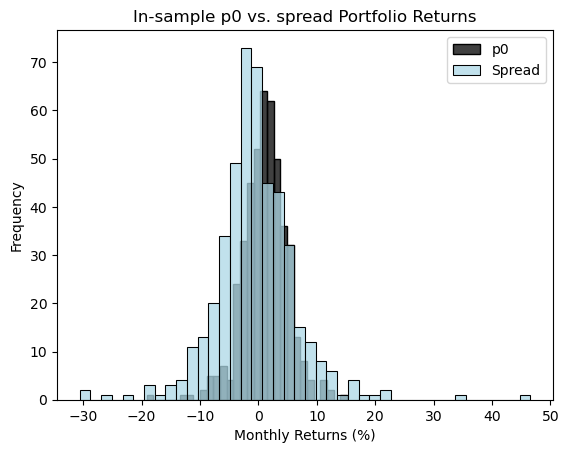

In [127]:


sns.histplot(insample['p0'], color = 'black', label = 'p0')
sns.histplot(insample['spread'], color = 'lightblue', label = 'Spread')
plt.title('In-sample p0 vs. spread Portfolio Returns')
plt.xlabel("Monthly Returns (%)")
plt.ylabel("Frequency")
plt.legend()

plt.show()


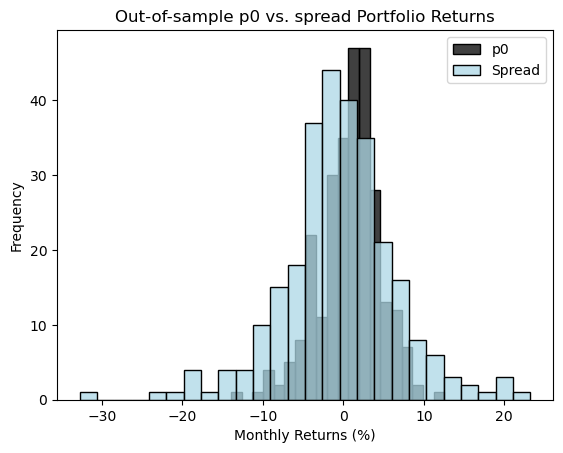

In [128]:
sns.histplot(outsample['p0'], color = 'black', label = 'p0')
sns.histplot(outsample['spread'], color = 'lightblue', label = 'Spread')
plt.title('Out-of-sample p0 vs. spread Portfolio Returns')
plt.xlabel("Monthly Returns (%)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

/tmp/ipykernel_27425/3056608484.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0','p0','p1','p2','p3','p4','spread'])


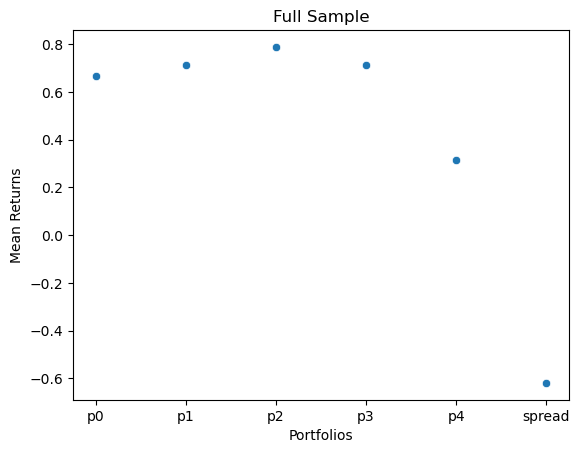

In [101]:
means = [port[i].mean() for i in names]

g = sns.scatterplot(means)
g.set_xticklabels(['0','p0','p1','p2','p3','p4','spread'])

g.set(title = "Full Sample Mean Portfolio Returns", xlabel='Portfolios', ylabel='Mean Returns')
plt.show()

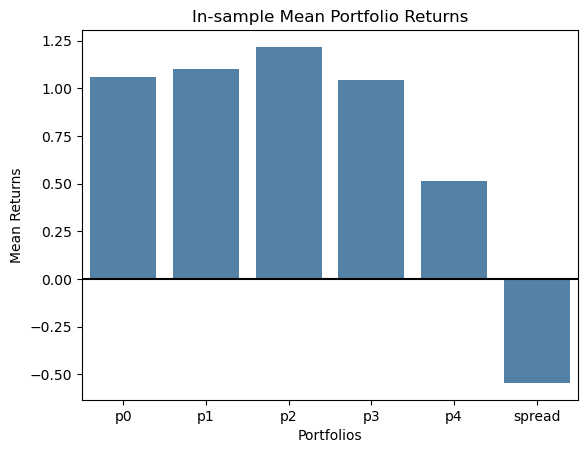

In [185]:
means = [insample[i].mean() for i in names]
means2 = [1.04,1.16,1.20,0.87,-0.02,-1.06]
#bars = 
g = sns.barplot(insample, color = 'steelblue', errorbar=None)
plt.axhline(0, color = 'black')

#h = sns.scatterplot(means, color = 'green')
#h.set_xticklabels(['0','p0','p1','p2','p3','p4','spread'])
#g.set_xticklabels(['0','p0','p1','p2','p3','p4','spread'])

g.set(title = "In-sample Mean Portfolio Returns", xlabel='Portfolios', ylabel='Mean Returns')
#plt.legend()
plt.show()

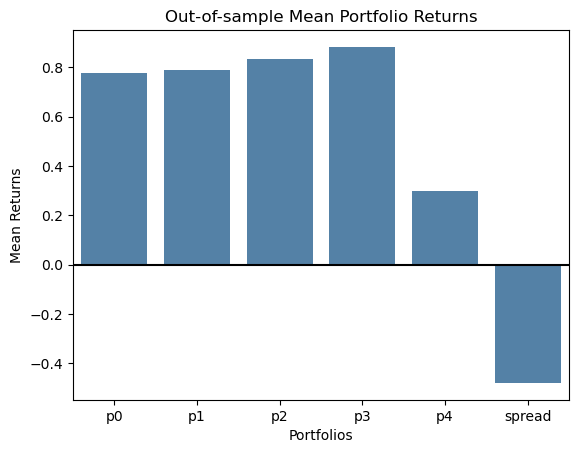

In [184]:
#means = [outsample[i].mean() for i in names]

g = sns.barplot(outsample, color = 'steelblue', errorbar=None)
plt.axhline(0, color = 'black')
#g.set_xticklabels(['0','p0','p1','p2','p3','p4','spread'])

g.set(title = "Out-of-sample Mean Portfolio Returns", xlabel='Portfolios', ylabel='Mean Returns')
plt.show()